# THE SPARKS FOUNDATION



## GRIP- GRADUATE ROTATIONAL INTERNSHIP PROGRAM -Data Science and Business Analytics - August 2021


## Author- Kinsu Patel


## Task-1 Prediction using Supervised ML (Level - Beginner)

Dataset used - http://bit.ly/w-data

Predict the percentage of the student based on the number based on the number of study hours.


## Step:1 - Importing all libraries required in this notebook¶

In [5]:
import pandas as pd
import numpy as np   

import matplotlib.pyplot as plt  
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Step:2 - Reading data from csv file.

In [8]:
df=pd.read_csv("student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Plotting the data using Matplotlib


Text(0, 0.5, 'Scores obtained')

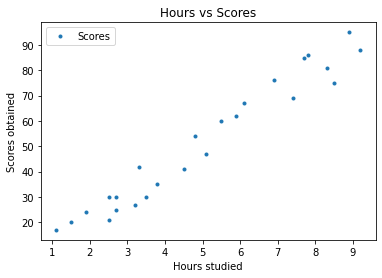

In [12]:
df.plot(x='Hours',y='Scores', style='.')
plt.title('Hours vs Scores')
plt.xlabel('Hours studied')
plt.ylabel('Scores obtained')

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.



## Step-3 - Preparing the data for training


In [15]:
#Dividing the attributes and labels i.e. input and output.

X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [16]:
#Splitting of data set into training and test set using Scikit's built-in function called tain_test_split().

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)


In [17]:
#Checking the number of columns and rows in the divided set using shape method.
X_train.shape,X_test.shape

((20, 1), (5, 1))

In [18]:
y_train.shape,y_test.shape

((20,), (5,))

## Step-4 - Training the model

The splitted data det is then loaded into the model and fit using Linear Regression.



In [19]:
from sklearn.linear_model import LinearRegression  
Reg= LinearRegression()
Reg.fit(X_train,y_train)
print('Training of model is complete.')

Training of model is complete.


In [20]:
# Finding the coefficient to fit the line for linear regression.

# The below value means that for every one unit of change in hours studied, the change in the score is about 
# 9.91%. Or in simpler words, if a student studies one hour more than they previously studied for an exam, 
# they can expect to achieve an increase of 9.91% in the score achieved by the student previously.

Reg.coef_

array([9.91065648])

In [21]:
#Printing the value of intercept, i.e, slope to plot the line.
Reg.intercept_

2.018160041434662

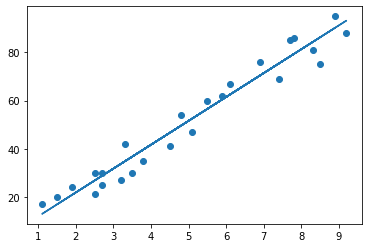

In [22]:
#Plotting the regression line
line = Reg.coef_*X+Reg.intercept_

#Plotting a scatter plot of test data
plt.scatter(X, y)
plt.plot(X, line)

## Final Prediction


In [23]:
Pred = Reg.predict(X_test)
Pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [24]:
#Merging into dataframe
Prediction =pd.DataFrame({'Hours Studied': [ x[0] for x in X_test],'Actual Marks': y_test, 'Predicted Marks': Pred})  
Prediction

,Hours Studied,Actual Marks,Predicted Marks
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


## Step-6 - Predicting the score obtained by a student who studies for 9.5 hours.¶

According to the model, a student scores on average of about 93.69 if he studies for 9.25 hours per day.





In [27]:
# hours = 9.25
final_pred = Reg.predict([[hours]])
print("A student who has studied {} hours can score about {} marks.".format(hours,(final_pred[0])))

A student who has studied 9.25 hours can score about 93.69173248737539 marks.


## Step-7 - Evaluation of model¶


The final step is to evaluate the performance of algorithm. This step is important to compare how well different algorithms perform on a particular dataset. The lower value of 4.18 means that the overall error in evaluating the actual score and predicted score in 4.18.




In [26]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, Pred))

Mean Absolute Error: 4.183859899002982
